# Plot Evaluation Results

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division, absolute_import, print_function

from fastText import train_unsupervised
from fastText import load_model
import os
import gensim, logging
from gensim.scripts.glove2word2vec import glove2word2vec
import errno
from glove import Corpus, Glove
from datetime import datetime
import sys
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.rcParams['text.latex.preamble'] = [
    '\\usepackage{amsfonts}'
]

## Read the results CSV into Pandas Dataframe

In [4]:
df = pd.read_csv('./results/eval/results.csv', sep=',')
df.head()

,analogies_synacc,analogies_semacc,analogies_overallacc,simlex999_pearson,simlex999_pearson_pvalue,simlex_999_spearman,simlex999_spearman_pvalue,simlex999_oov,wordsim353_pearson,wordsim353_pearson_pvalue,...,fashionsim_pearson_pvalue,fashionsim_spearman,fashionsim_spearman_pvalue,fashionsim_oov,dimension,context,model,algorithm,data,name
0,76.847540,78.161655,77.081122,0.623877,1.796325e-39,0.658922,2.534606e-45,0.000000,0.447171,3.160263e-50,...,3.376178e-05,0.322558,9.451568e-04,58.367347,300,5,skipgram,word2vec,100billion_googlenews_en,googlenews
1,79.170498,84.905660,80.312293,0.698768,5.237591e-53,0.738808,3.981048e-62,0.000000,0.386917,5.474012e-37,...,2.713871e-05,0.346792,3.559766e-04,58.367347,300,5,skipgram,fasttext,wiki_en,fasttext_wiki
2,72.743348,79.206931,74.047187,0.604076,1.752304e-36,0.608535,3.879630e-37,0.000000,0.387783,3.687635e-37,...,1.912735e-04,0.312940,1.152686e-03,57.142857,300,?,-,glove,6billion_wiki,glove_wiki
3,70.742579,53.581142,69.017678,0.526994,4.750274e-26,0.521159,2.038931e-25,2.266289,0.139656,9.605602e-06,...,3.203093e-04,0.363980,1.457763e-04,57.551020,200,?,-,glove,27billion_twitter,glove_twitter
4,38.055117,28.601921,36.719928,0.483160,4.092539e-21,0.503326,4.807323e-23,4.532578,0.294466,2.702503e-21,...,1.403106e-28,0.613950,1.881867e-24,5.306122,300,3,skipgram,fasttext,74million_fashion,fasttext_fashion


## Select Desirable Fields

In [5]:
df1 = df[['fashionsim_spearman', "analogies_overallacc", "simlex_999_spearman", "wordsim353_spearman",'name']]

## Bar-plot of relative accuracies on three evaluation datasets for the Word-Similarity task 

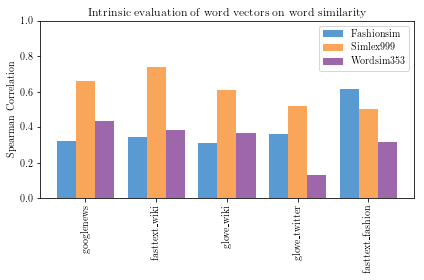

In [6]:
N = len(df1["fashionsim_spearman"].values[0:5])
#N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [4, 9, 2]
yvals = df1["fashionsim_spearman"].values[0:5]
rects1 = ax.bar(ind, yvals, width, color="#599ad3")
zvals = [1,2,3]
zvals = df1["simlex_999_spearman"].values[0:5]
rects2 = ax.bar(ind+width, zvals, width, color='#f9a65a')
kvals = [11,12,13]
kvals = df1["wordsim353_spearman"].values[0:5]
rects3 = ax.bar(ind+width*2, kvals, width, color='#9e66ab')

ax.set_ylabel('Spearman Correlation')
ax.set_xticks(ind+width)
labels = map(lambda x: x.replace("_", "\_"), df1["name"].values)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Fashionsim', 'Simlex999', 'Wordsim353') )
plt.ylim((0,1))
plt.title('Intrinsic evaluation of word vectors on word similarity')
plt.tight_layout()
plt.savefig('intrinsic_comparison_w_pretrained.eps', format='eps', dpi=1000)
plt.show()

## Extract Different Algorithms and Context Window Size

In [7]:
ft_skipgram = df.loc[df['algorithm'] == "fasttext"]
ft_skipgram = ft_skipgram.loc[ft_skipgram['data'] == "74million_fashion"]
ft_skipgram = ft_skipgram.loc[ft_skipgram['dimension'] == 300]
ft_skipgram = ft_skipgram.loc[ft_skipgram['model'] == "skipgram"]

ft_cbow = df.loc[df['algorithm'] == "fasttext"]
ft_cbow = ft_cbow.loc[ft_cbow['data'] == "74million_fashion"]
ft_cbow = ft_cbow.loc[ft_cbow['dimension'] == 300]
ft_cbow = ft_cbow.loc[ft_cbow['model'] == "cbow"]

glove = df.loc[df['algorithm'] == "glove"]
glove = glove.loc[glove['dimension'] == 300]
glove = glove.loc[glove['data'] == "74million_fashion"]


word2vec_skipgram = df.loc[df['algorithm'] == "word2vec"]
word2vec_skipgram = word2vec_skipgram.loc[word2vec_skipgram['dimension'] == 300]
word2vec_skipgram = word2vec_skipgram.loc[word2vec_skipgram['model'] == "1"]
word2vec_skipgram = word2vec_skipgram.loc[word2vec_skipgram['data'] == "74million_fashion"]

word2vec_cbow = df.loc[df['algorithm'] == "word2vec"]
word2vec_cbow = word2vec_cbow.loc[word2vec_cbow['dimension'] == 300]
word2vec_cbow = word2vec_cbow.loc[word2vec_cbow['model'] == "0"]
word2vec_cbow = word2vec_cbow.loc[word2vec_cbow['data'] == "74million_fashion"]

## Plot with respect to hyperparameters settings and algorithm used

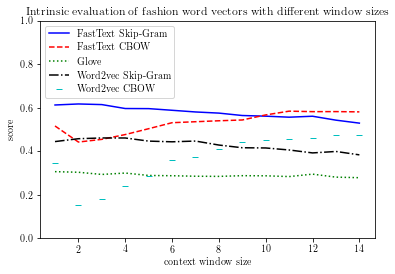

In [8]:
context_size = np.sort(ft_skipgram["context"].values.astype(int))
ft_skipgram_score = []
ft_cbow_score = []
glove_score = []
word2vec_skipgram_score = []
word2vec_cbow_score = []
for val in context_size:
    ft_skipgram_temp = ft_skipgram.loc[ft_skipgram['context'] == str(val)]
    ft_cbow_temp = ft_cbow.loc[ft_cbow['context'] == str(val)]
    glove_temp = glove.loc[glove['context'] == str(val)]
    word2vec_skipgram_temp = word2vec_skipgram.loc[word2vec_skipgram['context'] == str(val)]
    word2vec_cbow_temp = word2vec_cbow.loc[word2vec_cbow['context'] == str(val)]
    ft_skipgram_score.append(ft_skipgram_temp["fashionsim_spearman"].values[0])
    ft_cbow_score.append(ft_cbow_temp["fashionsim_spearman"].values[0])
    glove_score.append(glove_temp["fashionsim_spearman"].values[0])
    word2vec_skipgram_score.append(word2vec_skipgram_temp["fashionsim_spearman"].values[0])
    word2vec_cbow_score.append(word2vec_cbow_temp["fashionsim_spearman"].values[0])

la = plt.plot(context_size,ft_skipgram_score,'b-',label='FastText Skip-Gram')
lb = plt.plot(context_size,ft_cbow_score,'r--',label='FastText CBOW')
lc = plt.plot(context_size,glove_score,'g:',label='Glove')
ld = plt.plot(context_size,word2vec_skipgram_score,'k-.',label='Word2vec Skip-Gram')
le = plt.plot(context_size,word2vec_cbow_score,'c_',label='Word2vec CBOW')
ll = plt.legend(loc='upper left')
lx = plt.xlabel('context window size')
ly = plt.ylabel('score')
plt.ylim((0,1))
plt.title('Intrinsic evaluation of fashion word vectors with different window sizes')
plt.savefig('intrinsic_comparison_hyperparams.eps', format='eps', dpi=1000)
plt.show()

In [9]:
ft_skipgram = df.loc[df['algorithm'] == "fasttext"]
ft_skipgram = ft_skipgram.loc[ft_skipgram['data'] == "74million_fashion"]
ft_skipgram = ft_skipgram.loc[ft_skipgram['context'] == "2"]
ft_skipgram = ft_skipgram.loc[ft_skipgram['model'] == "skipgram"]

In [10]:
ft_skipgram.head()

,analogies_synacc,analogies_semacc,analogies_overallacc,simlex999_pearson,simlex999_pearson_pvalue,simlex_999_spearman,simlex999_spearman_pvalue,simlex999_oov,wordsim353_pearson,wordsim353_pearson_pvalue,...,fashionsim_pearson_pvalue,fashionsim_spearman,fashionsim_spearman_pvalue,fashionsim_oov,dimension,context,model,algorithm,data,name
6,41.793927,24.226254,39.312632,0.479379,9.117858e-21,0.503328,4.805263e-23,4.532578,0.279044,3.361024e-19,...,2.530226e-28,0.616825,9.956946e-25,5.306122,300,2,skipgram,fasttext,74million_fashion,fasttext_fashion_dim300_c2_skipgram
78,18.053361,13.927428,17.470606,0.427161,2.226342e-16,0.405324,9.321789e-15,4.532578,0.245098,4.893878e-15,...,1.045471e-22,0.487726,2.880694e-15,5.306122,50,2,skipgram,fasttext,74million_fashion,fasttext_fashion_dim50_c2_skipgram
79,31.499035,23.959445,30.434127,0.448476,4.436732e-18,0.433834,6.730561e-17,4.532578,0.291861,6.234100e-21,...,1.817303e-26,0.545063,2.360691e-19,5.306122,100,2,skipgram,fasttext,74million_fashion,fasttext_fashion_dim100_c2_skipgram
80,37.344216,28.335112,36.071752,0.423747,4.064254e-16,0.419133,9.070770e-16,4.532578,0.297521,1.002941e-21,...,1.517731e-29,0.586768,7.413208e-23,5.306122,150,2,skipgram,fasttext,74million_fashion,fasttext_fashion_dim150_c2_skipgram
81,40.240477,26.093917,38.242388,0.447935,4.916908e-18,0.456358,9.712982e-19,4.532578,0.275524,9.693527e-19,...,7.150122e-28,0.585847,8.970697e-23,5.306122,200,2,skipgram,fasttext,74million_fashion,fasttext_fashion_dim200_c2_skipgram


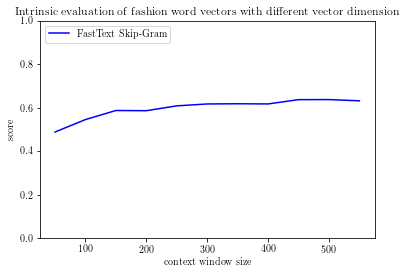

In [11]:
dimension_size = np.sort(ft_skipgram["dimension"].values.astype(int))
ft_skipgram_score = []
#ft_cbow_score = []
#glove_score = []
#word2vec_skipgram_score = []
#word2vec_cbow_score = []
for val in dimension_size:
    ft_skipgram_temp = ft_skipgram.loc[ft_skipgram['dimension'] == val]
    #ft_cbow_temp = ft_cbow.loc[ft_cbow['context'] == str(val)]
    #glove_temp = glove.loc[glove['context'] == str(val)]
    #word2vec_skipgram_temp = word2vec_skipgram.loc[word2vec_skipgram['context'] == str(val)]
    #word2vec_cbow_temp = word2vec_cbow.loc[word2vec_cbow['context'] == str(val)]
    ft_skipgram_score.append(ft_skipgram_temp["fashionsim_spearman"].values[0])
    #ft_cbow_score.append(ft_cbow_temp["fashionsim_spearman"].values[0])
    #glove_score.append(glove_temp["fashionsim_spearman"].values[0])
    #word2vec_skipgram_score.append(word2vec_skipgram_temp["fashionsim_spearman"].values[0])
    #word2vec_cbow_score.append(word2vec_cbow_temp["fashionsim_spearman"].values[0])

la = plt.plot(dimension_size,ft_skipgram_score,'b-',label='FastText Skip-Gram')
#lb = plt.plot(context_size,ft_cbow_score,'r--',label='FastText CBOW')
#lc = plt.plot(context_size,glove_score,'g:',label='Glove')
#ld = plt.plot(context_size,word2vec_skipgram_score,'k-.',label='Word2vec Skip-Gram')
#le = plt.plot(context_size,word2vec_cbow_score,'c_',label='Word2vec CBOW')
ll = plt.legend(loc='upper left')
lx = plt.xlabel('context window size')
ly = plt.ylabel('score')
plt.ylim((0,1))
plt.title('Intrinsic evaluation of fashion word vectors with different vector dimension')
plt.savefig('intrinsic_comparison_dimensions.eps', format='eps', dpi=1000)
plt.show()